### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [46]:
df = pd.read_csv(url)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

df = pd.concat([df, df2, df3, df4])
df


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
2354,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980
2355,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2356,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250


In [3]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    ingreso = df["Precio"].sum()
    print(f"Ingreso total {nombre}: ${ingreso}")


Ingreso total Tienda 1: $1150880400.0
Ingreso total Tienda 2: $1116343500.0
Ingreso total Tienda 3: $1098019600.0
Ingreso total Tienda 4: $1038375700.0


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [4]:
conteo_t1 = tienda.groupby("Categoría del Producto").size().rename("Tienda 1")
conteo_t2 = tienda2.groupby("Categoría del Producto").size().rename("Tienda 2")
conteo_t3 = tienda3.groupby("Categoría del Producto").size().rename("Tienda 3")
conteo_t4 = tienda4.groupby("Categoría del Producto").size().rename("Tienda 4")

# Unificamos todo en una tabla
conteo_total = pd.concat([conteo_t1, conteo_t2, conteo_t3, conteo_t4], axis=1).fillna(0).astype(int)

# Conseguimos la categoría más popular por tienda (mayor cantidad)
categorias_populares = conteo_total.idxmax()
valores_maximos = conteo_total.max()

# Imprimimos la categoría con más ventas por tienda
categorias_mas_populares = conteo_total.idxmax()

print(conteo_total)
print("Categorías más populares por tienda:")
print(categorias_mas_populares)

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480
Categorías más populares por tienda:
Tienda 1    Muebles
Tienda 2    Muebles
Tienda 3    Muebles
Tienda 4    Muebles
dtype: object


# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [5]:
# Calificaciones promedio por tienda
calif_t1 = tienda["Calificación"].mean()
calif_t2 = tienda2["Calificación"].mean()
calif_t3 = tienda3["Calificación"].mean()
calif_t4 = tienda4["Calificación"].mean()

# Agrupamos en un dataframe para una mejor visualización
calificaciones_promedio = pd.DataFrame({
    "Tienda 1": [calif_t1],
    "Tienda 2": [calif_t2],
    "Tienda 3": [calif_t3],
    "Tienda 4": [calif_t4]
}).round(2)  # Redondeamos a 2 decimales

print("Calificación promedio de los clientes por tienda:")
print(calificaciones_promedio)


Calificación promedio de los clientes por tienda:
   Tienda 1  Tienda 2  Tienda 3  Tienda 4
0      3.98      4.04      4.05       4.0


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [6]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
df_concatenado = pd.concat([tienda, tienda2, tienda3, tienda4])


In [9]:
# Hacemos un top de los 5 productos más vendidos y menos vendidos por cada tienda
df_top_5_productos = df_concatenado.groupby(['Tienda', 'Producto']).size()
df_top_5_productos = df_top_5_productos.unstack(level=0)

# Sacamos el total de producto
df_top_5_productos['Total'] = df_top_5_productos.sum(axis=1)

# Ordenamos de mayor a menor
df_top_5_productos = df_top_5_productos.sort_values(by='Total', ascending=False)

# 5 productos más vendidos
df_mejores_5_productos = df_top_5_productos.head(5)

# 5 productos menos vendidos
df_peores_5_productos = df_top_5_productos.tail(5)

print("Top 5 productos más vendidos por tienda:")
print(df_mejores_5_productos)

print("Top 5 productos menos vendidos por tienda:")
print(df_peores_5_productos)

Top 5 productos más vendidos por tienda:
Tienda                     Tienda 1  Tienda 2  Tienda 3  Tienda 4  Total
Producto                                                                
Mesa de noche                    56        44        55        55    210
Microondas                       60        62        36        48    206
Carrito de control remoto        52        47        52        55    206
Batería                          53        61        41        48    203
Cama king                        44        45        56        56    201
Top 5 productos menos vendidos por tienda:
Tienda                       Tienda 1  Tienda 2  Tienda 3  Tienda 4  Total
Producto                                                                  
Ciencia de datos con Python        39        43        46        38    166
Guitarra eléctrica                 47        47        38        33    165
Mochila                            39        45        36        43    163
Auriculares con micrófono     

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [17]:
# Calculamos el costo de envío promedio para cada tienda
envio_promedio_t1 = tienda["Costo de envío"].mean()
envio_promedio_t2 = tienda2["Costo de envío"].mean()
envio_promedio_t3 = tienda3["Costo de envío"].mean()
envio_promedio_t4 = tienda4["Costo de envío"].mean()

# Mostrarmos los resultados
print("Costo de envío promedio por tienda:")
print(f"- Tienda 1: ${envio_promedio_t1:.1f}")
print(f"- Tienda 2: ${envio_promedio_t2:.1f}")
print(f"- Tienda 3: ${envio_promedio_t3:.1f}")
print(f"- Tienda 4: ${envio_promedio_t4:.1f}")


Costo de envío promedio por tienda:
- Tienda 1: $26018.6
- Tienda 2: $25216.2
- Tienda 3: $24805.7
- Tienda 4: $23459.5


# 6. Visualización

Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

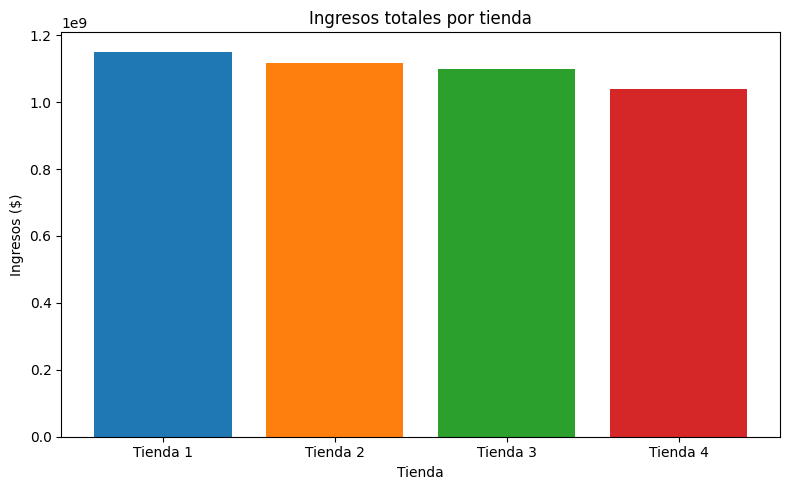

In [15]:
import matplotlib.pyplot as plt

# Ingresos por tienda
ingresos = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}


plt.figure(figsize=(8, 5))
plt.bar(ingresos.keys(), ingresos.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos ($)")
plt.tight_layout()
plt.show()


**Gráfico de columnas de ingresos totales por tienda**

Esto permite comparar de forma visual qué tienda genera más ingresos. Destacando la Tienda 1 con el mayor ingreso total.

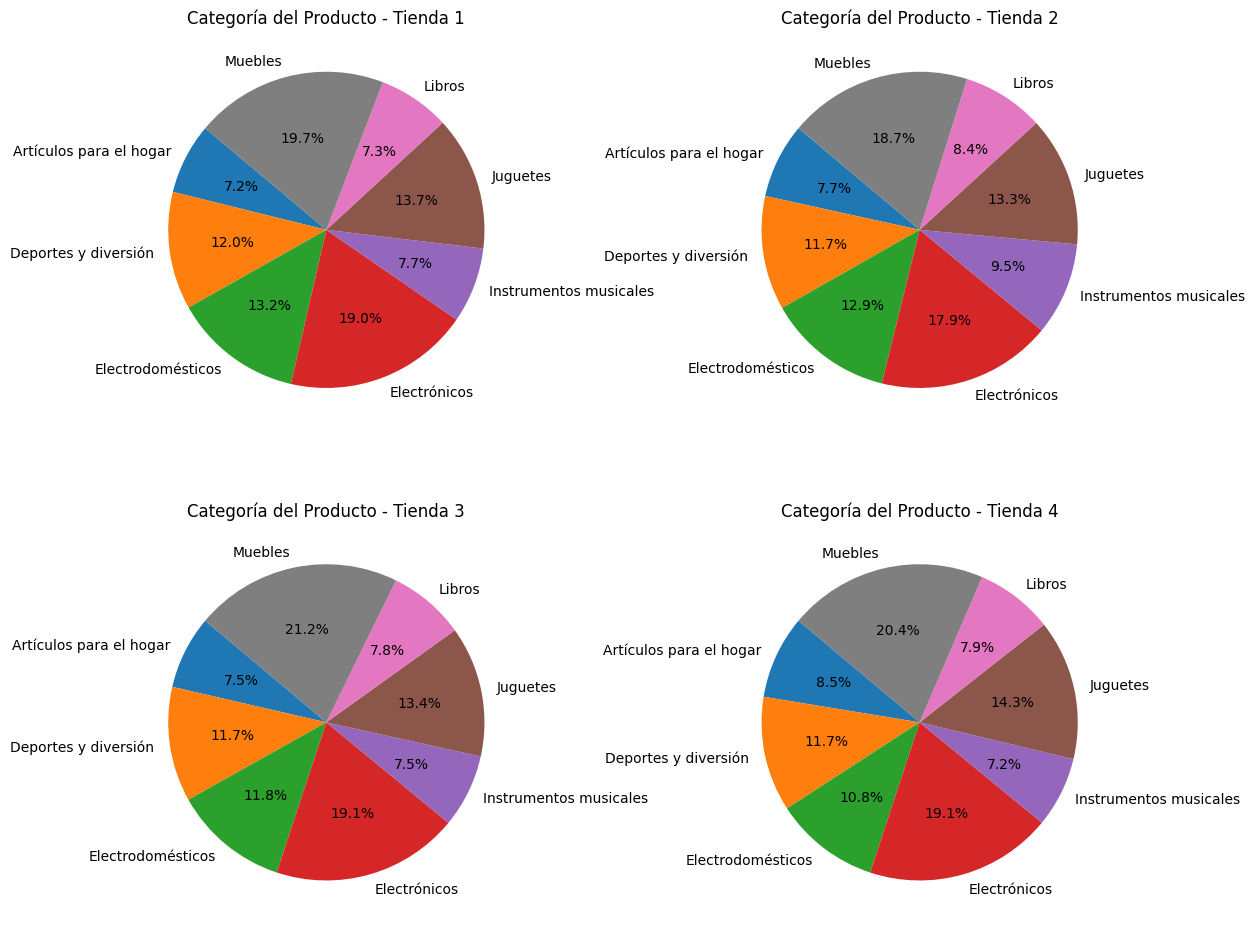

In [16]:
# Hacemos un grup by de tienda por producto y cantidad
tienda['Cantidad'] = 1
tienda2['Cantidad'] = 1
tienda3['Cantidad'] = 1
tienda4['Cantidad'] = 1

tienda_1 = tienda.groupby("Categoría del Producto")["Cantidad"].sum()
tienda_2 = tienda2.groupby("Categoría del Producto")["Cantidad"].sum()
tienda_3 = tienda3.groupby("Categoría del Producto")["Cantidad"].sum()
tienda_4 = tienda4.groupby("Categoría del Producto")["Cantidad"].sum()

# Hacemos un subplot para cada tienda en grafico de torta
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Establecemos 9 colores que se contrasten entre estos
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Primera tienda
axs[0, 0].pie(tienda_1, labels=tienda_1.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0, 0].set_title('Categoría del Producto - Tienda 1')

# Segunda tienda
axs[0, 1].pie(tienda_2, labels=tienda_2.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0, 1].set_title('Categoría del Producto - Tienda 2')

# Tercera tienda
axs[1, 0].pie(tienda_3, labels=tienda_3.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1, 0].set_title('Categoría del Producto - Tienda 3')

# Cuarta tienda
axs[1, 1].pie(tienda_4, labels=tienda_4.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1, 1].set_title('Categoría del Producto - Tienda 4')

plt.tight_layout()
plt.show()




**Gráfico de pastel para distribución de categorías de productos (Tienda 1 como ejemplo)**

Esto muestra qué categorías son más predominantes en cada tienda. Ilustrando un color en particular por categoría para mejorar la legibilidad.

<Axes: title={'center': 'Calificación promedio de los clientes por tienda'}, xlabel='Tienda'>

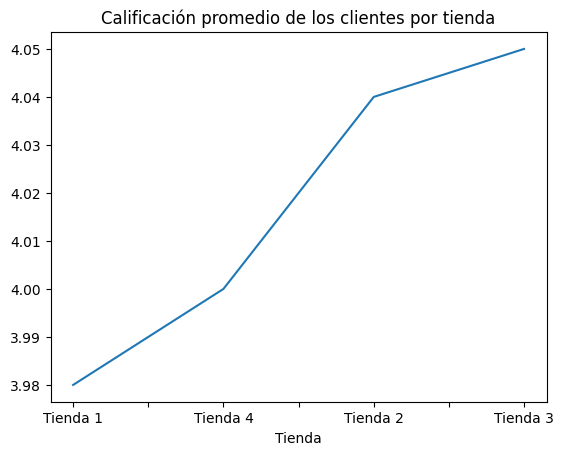

In [11]:
# Calificaciones promedio por tienda
calif_t1 = tienda["Calificación"].mean()
calif_t2 = tienda2["Calificación"].mean()
calif_t3 = tienda3["Calificación"].mean()
calif_t4 = tienda4["Calificación"].mean()

# Agrupamos en un dataframe para una mejor visualización
calificaciones_promedio = pd.DataFrame({
    "Tienda 1": [calif_t1],
    "Tienda 2": [calif_t2],
    "Tienda 3": [calif_t3],
    "Tienda 4": [calif_t4]
}).round(2)  # Redondeamos a 2 decimales

calificaciones_promedio.index = ['Calificación promedio']

# Difenciamos los gráficos pandas
calificaciones_promedio = calificaciones_promedio.transpose()

# Reseteamos el index
calificaciones_promedio = calificaciones_promedio.reset_index()

# Renombramos las columnas
calificaciones_promedio.columns = ['Tienda', 'Calificación promedio']

# Ordenamos por calificaciones promedio
calificaciones_promedio = calificaciones_promedio.sort_values(by='Calificación promedio', ascending=True)
calificaciones_promedio.plot(kind='line', x='Tienda', y='Calificación promedio', title='Calificación promedio de los clientes por tienda', legend=False)


**Gráfico de línea para mostrar la calificación promedio por tienda**

Esto sirve para analizar rápidamente cómo se comparan las tiendas en cuanto a satisfacción del cliente.

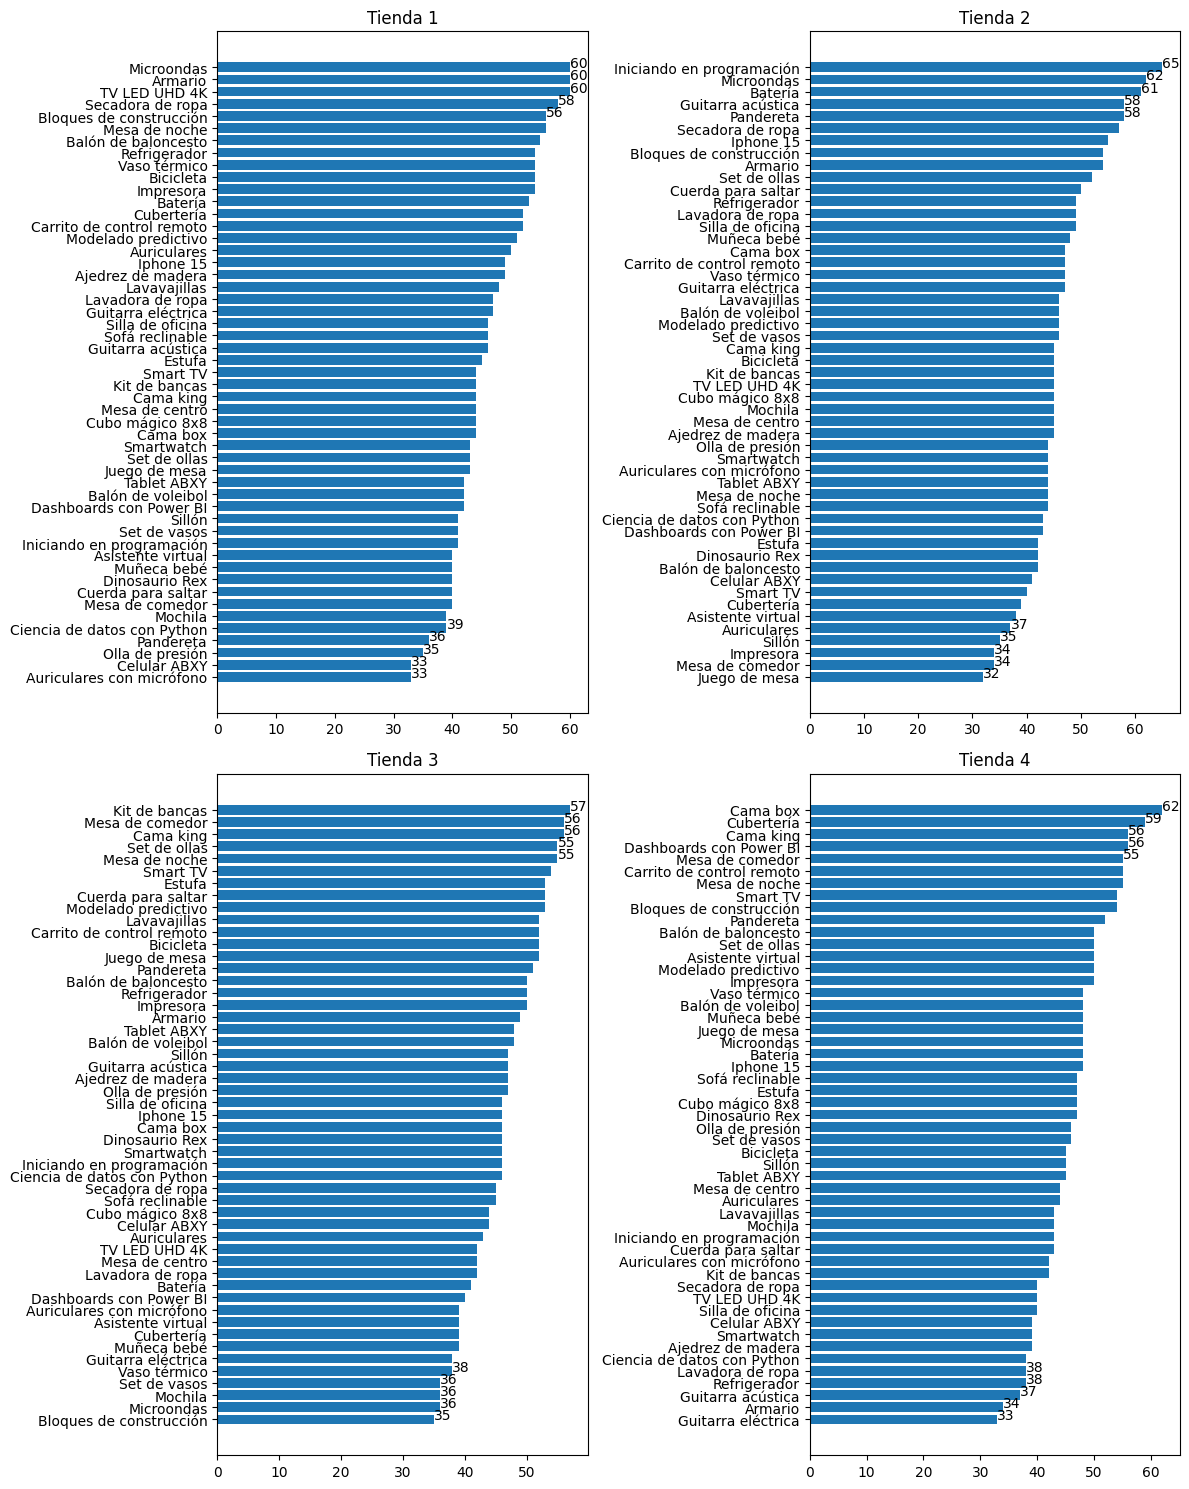

In [12]:
import matplotlib.pyplot as plt

df_plot_products_tienda_1 = df_top_5_productos['Tienda 1'].sort_values(ascending=True)
df_plot_products_tienda_2 = df_top_5_productos['Tienda 2'].sort_values(ascending=True)
df_plot_products_tienda_3 = df_top_5_productos['Tienda 3'].sort_values(ascending=True)
df_plot_products_tienda_4 = df_top_5_productos['Tienda 4'].sort_values(ascending=True)

# Generamos subplots mostrando cada tienda
fig, axs = plt.subplots(2, 2, figsize=(12, 15))

# Primera tienda
axs[0, 0].barh(df_plot_products_tienda_1.index, df_plot_products_tienda_1.values)
axs[0, 0].set_title('Tienda 1')
# Destacamos solamente los 5 mejores y 5 peores
for i, v in enumerate(df_plot_products_tienda_1.values):
    if i < 5 or i >= len(df_plot_products_tienda_1) - 5:
        axs[0, 0].text(v, i, str(v), color='black')


# Segunda tienda
axs[0, 1].barh(df_plot_products_tienda_2.index, df_plot_products_tienda_2.values)
axs[0, 1].set_title('Tienda 2')
# Destacamos solamente los 5 mejores y 5 peores
for i, v in enumerate(df_plot_products_tienda_2.values):
    if i < 5 or i >= len(df_plot_products_tienda_2) - 5:
        axs[0, 1].text(v, i, str(v), color='black')


# Tercera tienda
axs[1, 0].barh(df_plot_products_tienda_3.index, df_plot_products_tienda_3.values)
axs[1, 0].set_title('Tienda 3')
# Destacamos solamente los 5 mejores y 5 peores
for i, v in enumerate(df_plot_products_tienda_3.values):
    if i < 5 or i >= len(df_plot_products_tienda_3) -5:
        axs[1, 0].text(v, i, str(v), color='black')

# Cuarta tienda
axs[1, 1].barh(df_plot_products_tienda_4.index, df_plot_products_tienda_4.values)
axs[1, 1].set_title('Tienda 4')
# Destacamos solamente los 5 mejores y 5 peores
for i, v in enumerate(df_plot_products_tienda_4.values):
    if i < 5 or i >= len(df_plot_products_tienda_4) -5:
        axs[1, 1].text(v, i, str(v), color='black')

fig.tight_layout()
plt.show()


**Gráfico de barras horizontales con el top 5 más y menos vendidos**

A partir de estos gráficos se pueden visualizar los productos más y menos vendidos por cada tienda, destacando el top 5 con mayor y menor venta.

Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

- Las categorías de productos más y menos vendidas.

- Las calificaciones promedio de los clientes por tienda.

- Los productos más y menos vendidos.

- El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

##**Informe final**

###Introducción

Este informe tiene como propósito revisar los datos de ventas de cuatro tiendas diferentes para determinar cuál ofrece la mejor opción comercial para el Sr. Juan, quien desea vender sus productos en el lugar más adecuado. En este análisis, se tuvieron en cuenta varios aspectos importantes: los ingresos totales de cada tienda, los productos que se venden mejor y peor, las categorías más relevantes, las calificaciones de los clientes y los costos de envío promedio. La idea es ofrecer una recomendación basada en datos y gráficos que respalden los resultados.

###Desarrollo

***1. Ingresos totales por tienda***

A través del análisis de los ingresos acumulados por tienda, se observó que la Tienda 1 presenta los mayores ingresos totales con 1.150.880.400,0 lo cual es un indicio de un mayor volumen de ventas o registro de precios más altos. Continua la Tienda 2 con un ingreso total de 1.116.343.500,0 con tan solo una diferencia de 18.323.900  de la tienda 3 con un ingreso total de 1.098.019.600,0. En contraste, por último con los ingresos más bajos del grupo esta la Tienda 4 con 1.038.375.700,0. mostrando un redimiento notablemente inferior frente a las 3 anteriores.

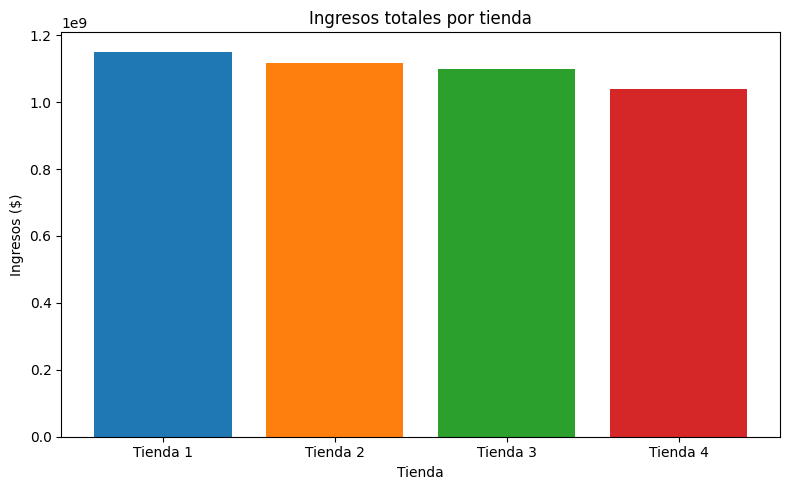

***2. Categorías de productos más y menos Vendidas***

Las categorías con mayor rotación de productos varían entre tiendas, sin embargo, en todas las tiendas predomina la categoría "Muebles" y "Electrónicos" que destaca como la más vendida en cada tienda, donde la Tienda 3 lidera con un 21.2% y 19.1% respectivamente. En contraste, dentro de las categorías de productos menos vendidas se encuentran "Artículos para el hogar" y "Libros" donde la tienda número 1 presenta los porcentajes de venta más bajos con 7.2% y 7.3% respectivamente. Es importante señalar que si bien la Tienda 4 es la que presenta menores ventas en general, posee un fuerte enfoque en productos como "Juguetes" siendo la tienda que lidera en la tercera categoría más vendida con 14.3%.

Este dato es relevante si el Sr. Juan vende productos de una categoría específica, ya que deberá considerar si dicha categoría tiene alta demanda en la tienda seleccionada.
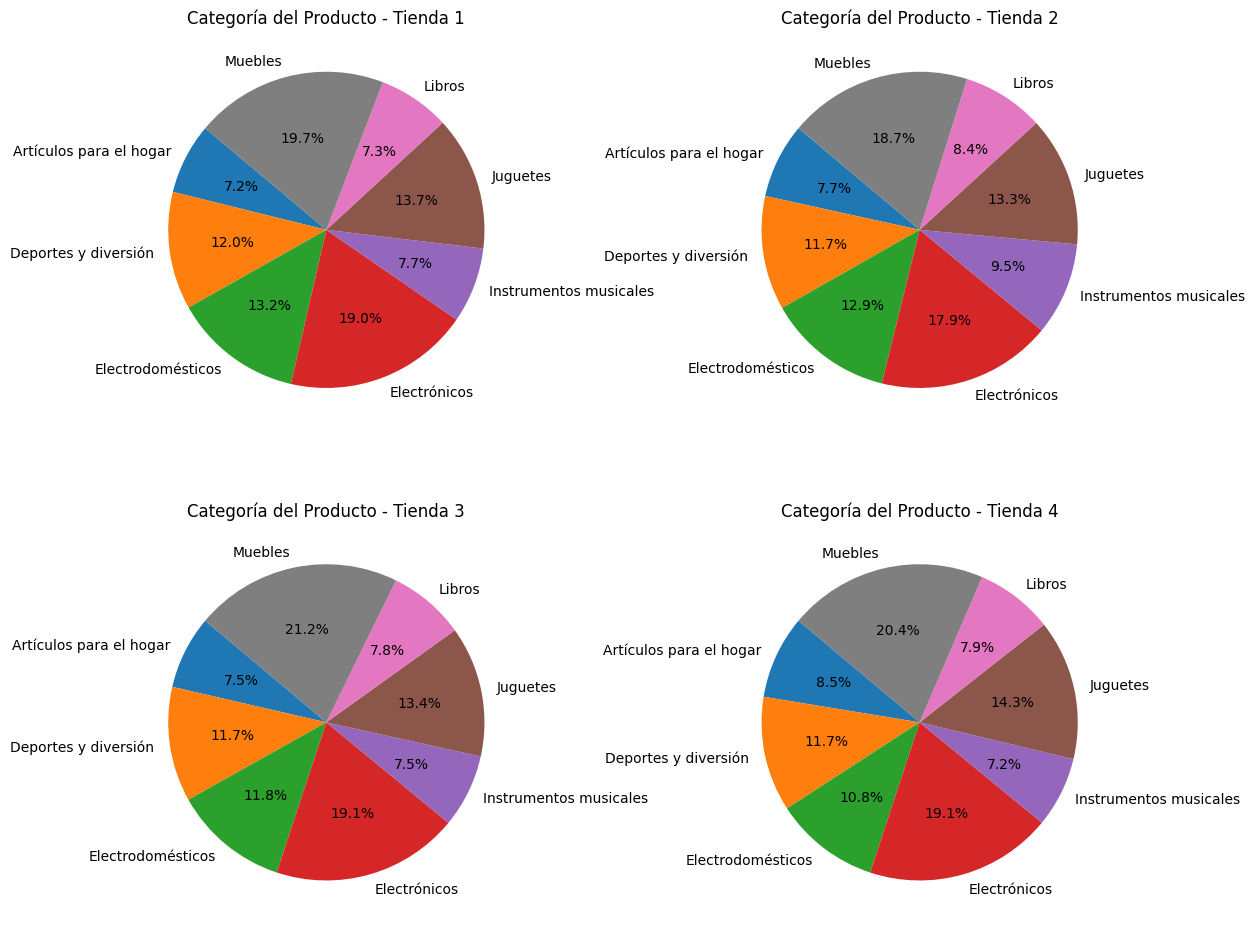


***3. Calificaciones promedio de los clientes***

Las calificaciones reflejan la percepción del cliente sobre su experiencia de compra o calidad del producto. Comenzando por la Tienda 3 que presenta la mejor calificación promedio con 4.05. Con una leve diferencia de 0.1 le sigue la Tienda 2 en 4.04. A continuación se encuentra la Tienda 4 con una calificación aceptable de 4.00 y por último con probablemente varios productos mal evaluados y/o mal servicio, la Tienda 1 con 3.98.

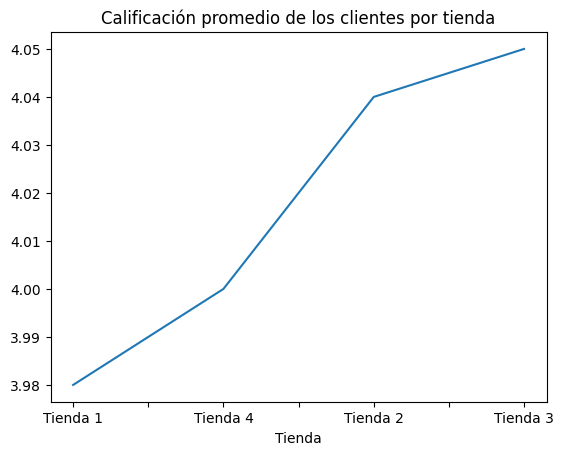

***4. Productos más y menos vendidos***

Dentro del top 5 de los productos más vendidos están: “Mesa de noche, Microondas, Carrito del control remoto, Batería y Cama King” del total destaca con 62 ventas en la Tienda 2 con el producto “Microondas”. Por otro lado, para contrastar está el top 5 de los productos con menos ventas, tales como: “Ciencia de datos con Python, Guitarra eléctrica, Mochila, Auriculares con micrófono y Celular ABXY” y entre estos el producto con menos vendido del total está el “Celular ABXY” con 33 ventas en la Tienda 1.
Esto indica una tendencia en productos electronicos relacionados al hogar, abriendo el espacio a crear una nueva categoría de "Electro-Hogar" y por otro lado a potenciar en comunicación una categoría relacionada con "Personal-electro" para incrementar las ventas a través de ofertas exlusivas con la venta de packs o bundles de los productos menos vendidos.

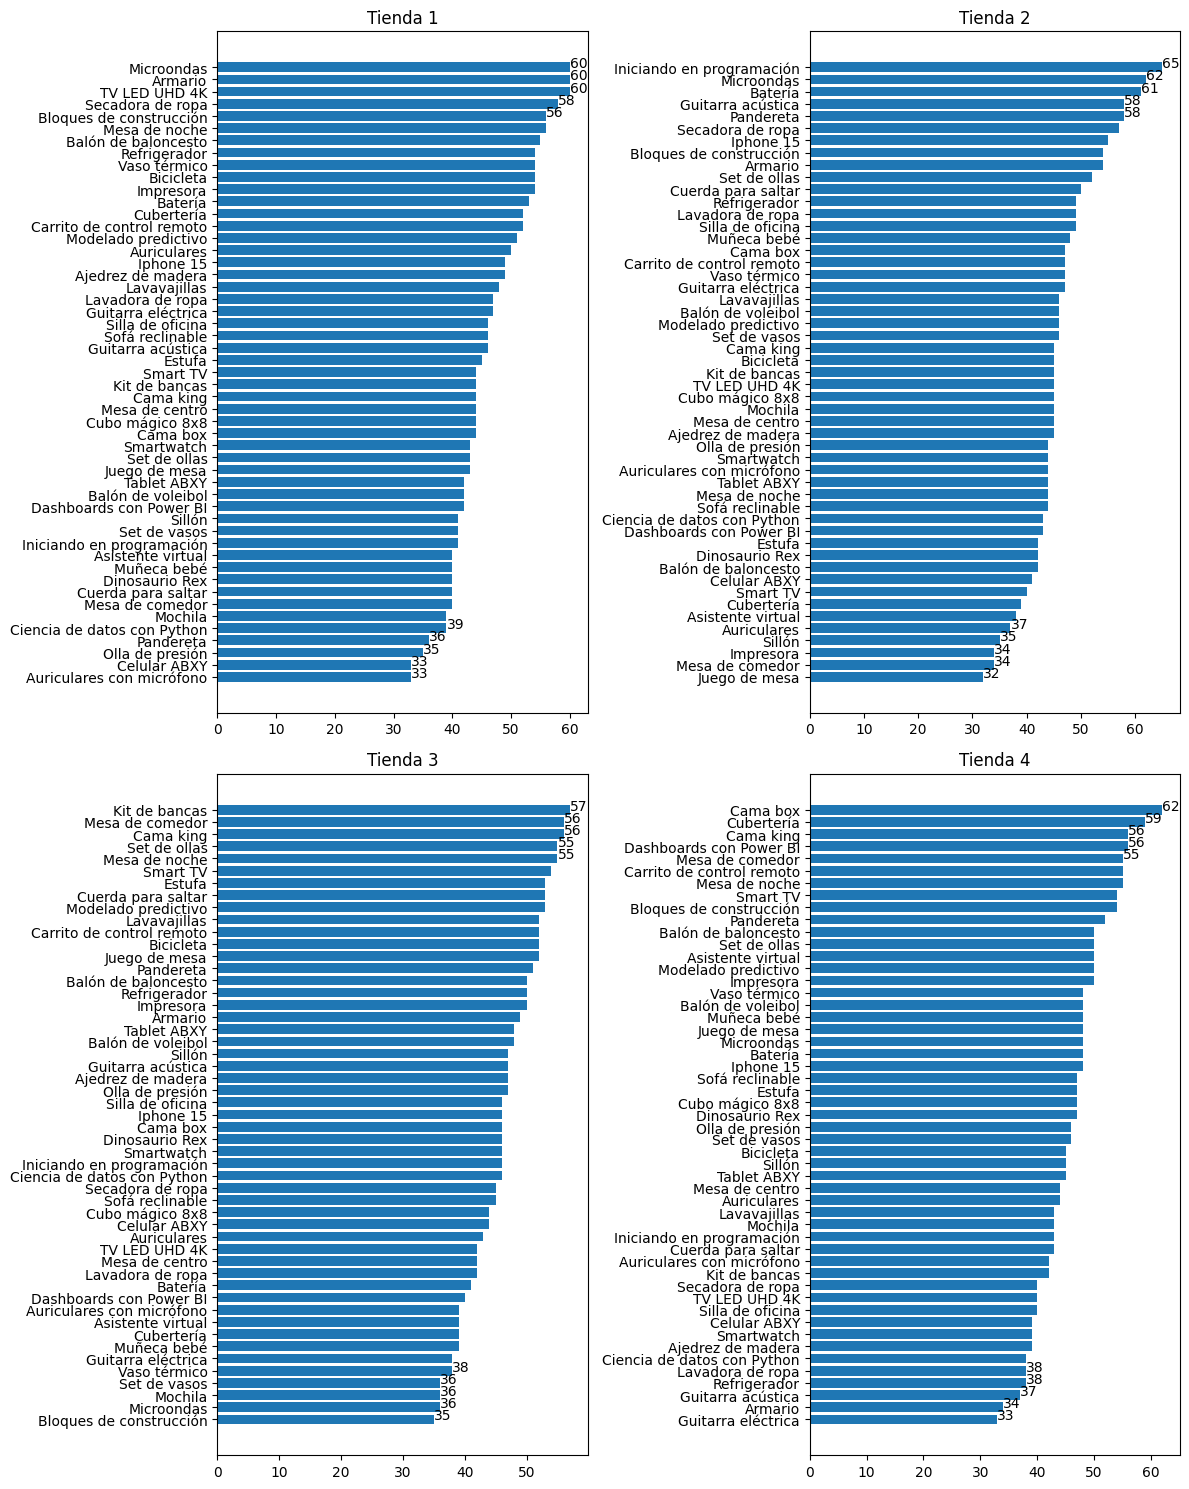


***5. Coste de envío promedio***

Se detectó que la Tienda 4 posee el coste promedio de envío más bajo con 23459,5, lo cual representa una ventaja competitiva al momento de atraer clientes sensibles al precio. Las otras tiendas como la número 1 (el más alto) presentan costes más elevados como 26018,6, lo cual podría disminuir la tasa de conversión.

###Conclusión


Después de revisar los ingresos, las categorías más populares, las calificaciones de los clientes, los productos destacados y los costos de envío, se sugiere que el Sr. Juan opte por vender en la Tienda 3.

Esta tienda tiene un buen equilibrio entre varios factores:

- Genera ingresos que son bastante buenos, casi al nivel de la mejor.

- Ofrece una buena satisfacción a los clientes, con una calificación promedio de 4.05.

- Lidera en categorías importantes como Muebles y Electrónicos.

- Sus costos de envío son competitivos, sin ser ni los más altos ni los más bajos.

Aunque la Tienda 1 muestra ingresos más altos, su baja calificación y elevados costos de envío la hacen menos atractiva. Por otro lado, la Tienda 4 tiene tarifas de envío más económicas, pero no tiene tanta demanda. Por todas estas razones, la Tienda 3 se presenta como la opción más fuerte y segura para el Sr. Juan.
